In [48]:
import pandas as pd
import numpy as np
import torch
from ctgan import CTGAN

In [49]:
root_path = 'C:/Users/pedro.ribeiro/Desktop/Pedro/MOVE/tcc/tri_project/'
csv_file_path = root_path+'Data/irt.csv'

# Define the CSV file path and read data into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df = df.iloc[:, 1:]

# Convert the DataFrame to a PyTorch tensor
data = torch.tensor(df.to_numpy(dtype=np.float32))

# Now, 'data' contains your data as a PyTorch tensor
# Convert the tensor to a Pandas DataFrame
df = pd.DataFrame(data)

# Create new column names
new_columns = ['Departamento'] + [f'Q{i}' for i in range(1, 11)]

# Rename the columns
df.columns = new_columns
df

,Departamento,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,2.0,4.0,5.0,3.0,1.0,5.0,2.0,3.0,5.0,4.0,2.0
1,3.0,4.0,5.0,0.0,2.0,2.0,1.0,5.0,1.0,3.0,3.0
2,6.0,5.0,4.0,2.0,5.0,3.0,2.0,5.0,4.0,1.0,5.0
3,6.0,1.0,4.0,1.0,3.0,4.0,5.0,3.0,2.0,1.0,5.0
4,2.0,3.0,1.0,2.0,0.0,2.0,3.0,3.0,4.0,4.0,1.0
5,6.0,4.0,5.0,2.0,4.0,1.0,2.0,3.0,2.0,2.0,5.0
6,4.0,1.0,0.0,4.0,2.0,4.0,3.0,2.0,4.0,5.0,5.0
7,2.0,2.0,1.0,4.0,0.0,4.0,4.0,4.0,0.0,4.0,2.0
8,3.0,0.0,2.0,5.0,4.0,4.0,3.0,1.0,1.0,1.0,4.0
9,6.0,0.0,1.0,0.0,5.0,0.0,5.0,3.0,5.0,3.0,3.0


In [50]:
ctgan = CTGAN(epochs=1000)
ctgan.fit(df)

# Create synthetic data
synthetic_data = ctgan.sample(1000)

In [51]:
new_data = synthetic_data
new_data.columns=['Departamento','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
df.columns=['Departamento','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
new_data = new_data.round(0)
new_data = new_data.applymap(lambda x: 0 if x < 0 else x)
new_data = new_data.applymap(lambda x: 0 if x == 0 else x)
new_data

,Departamento,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,3.0,5.0,0.0,4.0,1.0,0.0,3.0,3.0,2.0,3.0,1.0
1,2.0,0.0,0.0,4.0,5.0,3.0,4.0,1.0,5.0,5.0,4.0
2,1.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,5.0,2.0,4.0
3,1.0,3.0,1.0,5.0,2.0,3.0,0.0,3.0,4.0,3.0,2.0
4,2.0,5.0,4.0,4.0,1.0,2.0,2.0,3.0,4.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,5.0,5.0,5.0,4.0,5.0,0.0,5.0,3.0,2.0,1.0
996,2.0,2.0,2.0,0.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0
997,2.0,6.0,1.0,0.0,3.0,2.0,0.0,4.0,5.0,4.0,6.0
998,4.0,4.0,5.0,6.0,6.0,3.0,0.0,2.0,2.0,1.0,2.0


In [52]:
# Apply the lambda function to columns starting with "Q"
columns_to_process = [col for col in new_data.columns if col.startswith('Q')]

new_data[columns_to_process] = new_data[columns_to_process].applymap(lambda x: 5 if x > 5 else x)

# Display the modified DataFrame
new_data

,Departamento,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,3.0,5.0,0.0,4.0,1.0,0.0,3.0,3.0,2.0,3.0,1.0
1,2.0,0.0,0.0,4.0,5.0,3.0,4.0,1.0,5.0,5.0,4.0
2,1.0,5.0,4.0,2.0,4.0,3.0,1.0,4.0,5.0,2.0,4.0
3,1.0,3.0,1.0,5.0,2.0,3.0,0.0,3.0,4.0,3.0,2.0
4,2.0,5.0,4.0,4.0,1.0,2.0,2.0,3.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,5.0,5.0,5.0,4.0,5.0,0.0,5.0,3.0,2.0,1.0
996,2.0,2.0,2.0,0.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0
997,2.0,5.0,1.0,0.0,3.0,2.0,0.0,4.0,5.0,4.0,5.0
998,4.0,4.0,5.0,5.0,5.0,3.0,0.0,2.0,2.0,1.0,2.0


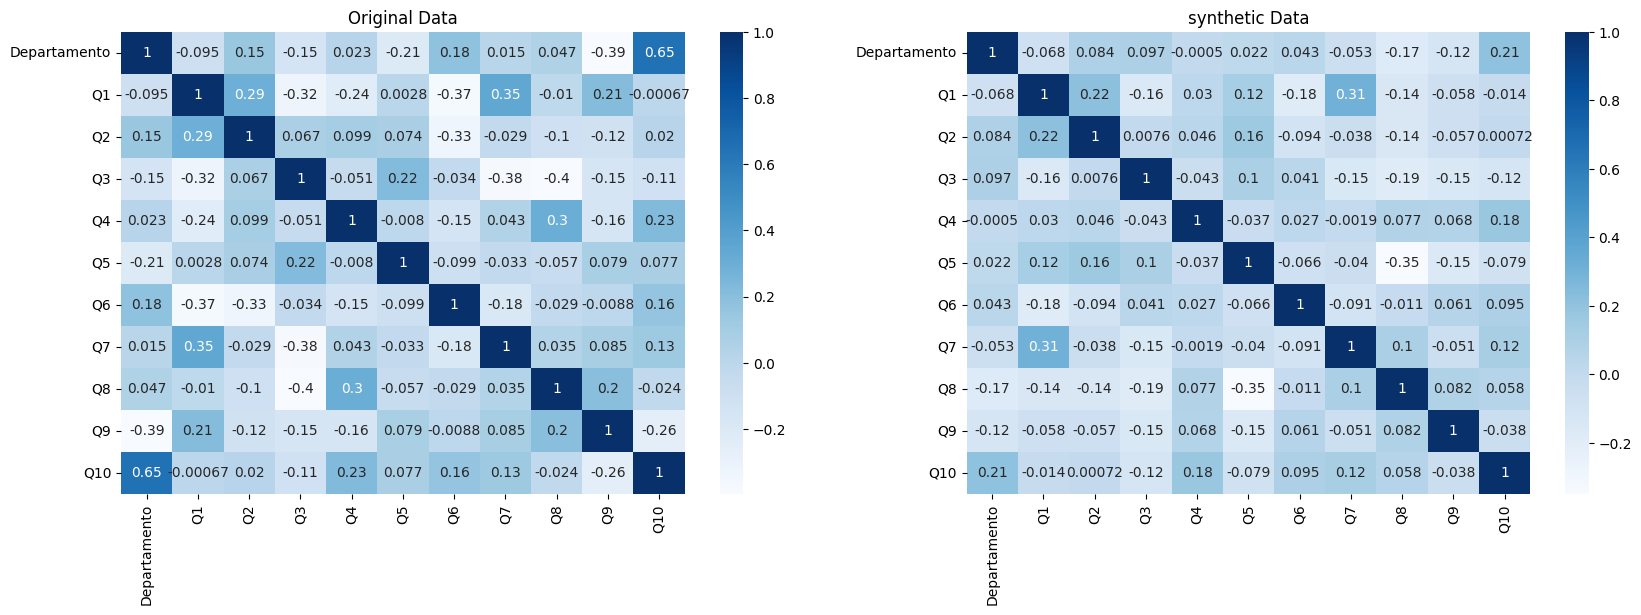

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.heatmap(df.corr(), annot=True, ax=ax[0], cmap="Blues")
sns.heatmap(new_data.corr(), annot=True, ax=ax[1], cmap="Blues")
ax[0].set_title("Original Data")
ax[1].set_title("synthetic Data")
plt.savefig(root_path+'imagens/corr_plot_gan.png')

In [55]:
new_data.to_csv(root_path+'Data/new_irt_gan.csv', index=False)

## realtabformer

In [56]:
!pip install realtabformer

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/126.8 kB ? eta -:--:--
     ------------------------------------ - 122.9/126.8 kB 3.6 MB/s eta 0:00:01
     -------------------------------------- 126.8/126.8 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/49.7 kB ? eta -:--:--
   ---------------------------------------- 49.7/49.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/265.7 kB ? eta -:--:--
   -------------------------------------- - 256.0/265.7 kB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 265.7/265.7 kB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/521.2 kB ? eta -:--:--
   ----------------------------- ---------- 389.1/521.2 kB 6.0 MB/s eta 0:00:01
   -----------

In [57]:
import pandas as pd
from realtabformer import REaLTabFormer

In [64]:
# Define the CSV file path and read data into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df = df.iloc[:, 1:]

# Convert the DataFrame to a PyTorch tensor
data = torch.tensor(df.to_numpy(dtype=np.float32))

# Now, 'data' contains your data as a PyTorch tensor
# Convert the tensor to a Pandas DataFrame
df = pd.DataFrame(data)

# Create new column names
new_columns = ['Departamento'] + [f'Q{i}' for i in range(1, 11)]

# Rename the columns
df.columns = new_columns

In [79]:
# Citation:
# https://arxiv.org/abs/2302.02041

save_model_folder = "C:/Users/pedro.ribeiro/Desktop/Pedro/MOVE/tcc/tri_project_model/rtf_model/"
# Non-relational or parent table.
rtf_model = REaLTabFormer(model_type="tabular", gradient_accumulation_steps=4)

# Fit the model on the dataset.
# Additional parameters can be
# passed to the `.fit` method.
rtf_model.fit(df)

# Save the model to the current directory.
# A new directory `rtf_model/` will be created.
# In it, a directory with the model's
# experiment id `idXXXX` will also be created
# where the artefacts of the model will be stored.
rtf_model.save(save_model_folder)

Computing the sensitivity threshold...
Using parallel computation!!!


C:\Users\pedro.ribeiro\AppData\Roaming\Python\Python311\site-packages\realtabformer\realtabformer.py:77: UserWarning: The device=cuda is not available, using device=cpu instead.
  warnings.warn(
C:\Users\pedro.ribeiro\AppData\Roaming\Python\Python311\site-packages\realtabformer\realtabformer.py:570: UserWarning: Duplicate rate (0.0) in the data is zero. The `qt_interval` will be set                     to qt_interval_unique=100.
  warnings.warn(
C:\Users\pedro.ribeiro\AppData\Roaming\Python\Python311\site-packages\realtabformer\realtabformer.py:597: UserWarning: qt_interval adjusted from 100 to 2...
  warnings.warn(


Bootstrap round:   0%|          | 0/500 [00:00<?, ?it/s]

Sensitivity threshold summary:
count    500.000000
mean       0.074400
std        0.126616
min       -0.025000
25%       -0.025000
50%        0.075000
75%        0.175000
max        0.625000
dtype: float64
Sensitivity threshold: 0.32499999999999996 qt_max: 0.05


Map:   0%|          | 0/25 [00:00<?, ? examples/s]

  0%|          | 0/5 [00:00<?, ?it/s]

{'train_runtime': 6.4353, 'train_samples_per_second': 19.424, 'train_steps_per_second': 0.777, 'train_loss': 3.6471012115478514, 'epoch': 5.0}


  0%|          | 0/12 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 128 samples generated. Sampling efficiency is: 100.0000%
Critic round: 5,                     sensitivity_threshold: 0.32499999999999996,                         val_sensitivity: 0.20833333333333334,                             val_sensitivities: [0.225, 0.275, 0.07500000000000001, 0.225, 0.225, 0.07500000000000001, -0.025, 0.225, -0.025, 0.125, 0.625, 0.17500000000000002, 0.32499999999999996, 0.42500000000000004, 0.17500000000000002]


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


  0%|          | 0/10 [00:00<?, ?it/s]

{'train_runtime': 4.8352, 'train_samples_per_second': 51.705, 'train_steps_per_second': 2.068, 'train_loss': 0.929292869567871, 'epoch': 10.0}


  0%|          | 0/12 [00:00<?, ?it/s]

There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Generated 0 invalid samples out of total 128 samples generated. Sampling efficiency is: 100.0000%
Saving not-best model...
Critic round: 10,                     sensitivity_threshold: 0.32499999999999996,                         val_sensitivity: 0.3283333333333333,                             val_sensitivities: [0.07500000000000001, 0.475, 0.17500000000000002, 0.17500000000000002, 0.275, 0.475, 0.375, 0.475, 0.42500000000000004, 0.375, 0.575, 0.125, 0.17500000000000002, 0.525, 0.225]


  0%|          | 0/15 [00:00<?, ?it/s]

{'train_runtime': 4.8402, 'train_samples_per_second': 77.476, 'train_steps_per_second': 3.099, 'train_loss': 0.4002757390340169, 'epoch': 15.0}


  0%|          | 0/12 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 128 samples generated. Sampling efficiency is: 100.0000%
Critic round: 15,                     sensitivity_threshold: 0.32499999999999996,                         val_sensitivity: 0.30499999999999994,                             val_sensitivities: [0.07500000000000001, 0.42500000000000004, 0.17500000000000002, 0.07500000000000001, 0.07500000000000001, 0.275, 0.32499999999999996, 0.625, 0.275, 0.42500000000000004, 0.725, 0.17500000000000002, 0.275, 0.475, 0.17500000000000002]


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


  0%|          | 0/20 [00:00<?, ?it/s]

{'train_runtime': 6.0463, 'train_samples_per_second': 82.695, 'train_steps_per_second': 3.308, 'train_loss': 0.222173810005188, 'epoch': 20.0}


  0%|          | 0/12 [00:00<?, ?it/s]

There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


Generated 0 invalid samples out of total 128 samples generated. Sampling efficiency is: 100.0000%
Critic round: 20,                     sensitivity_threshold: 0.32499999999999996,                         val_sensitivity: 0.33499999999999996,                             val_sensitivities: [0.07500000000000001, 0.42500000000000004, 0.225, 0.07500000000000001, 0.225, 0.275, 0.32499999999999996, 0.42500000000000004, 0.225, 0.375, 0.775, 0.42500000000000004, 0.42500000000000004, 0.42500000000000004, 0.32499999999999996]


  0%|          | 0/25 [00:00<?, ?it/s]

{'train_runtime': 6.1435, 'train_samples_per_second': 101.733, 'train_steps_per_second': 4.069, 'train_loss': 0.144523286819458, 'epoch': 25.0}


  0%|          | 0/12 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 128 samples generated. Sampling efficiency is: 100.0000%
Critic round: 25,                     sensitivity_threshold: 0.32499999999999996,                         val_sensitivity: 0.3516666666666667,                             val_sensitivities: [0.275, 0.375, 0.275, 0.275, 0.07500000000000001, 0.475, 0.275, 0.575, 0.32499999999999996, 0.475, 0.625, 0.07500000000000001, 0.375, 0.475, 0.32499999999999996]
Stopping training, no improvement in critic...


C:\Users\pedro.ribeiro\AppData\Roaming\Python\Python311\site-packages\realtabformer\realtabformer.py:834: UserWarning: No best model was saved. Loading the closest model to the sensitivity_threshold.
  warnings.warn(


Copying artefacts from: best-disc-model
Copying artefacts from: mean-best-disc-model
Copying artefacts from: not-best-disc-model
Copying artefacts from: last-epoch-model


In [81]:
import os

# List all subdirectories in the folder
subdirectories = [os.path.join(save_model_folder, d) for d in os.listdir(save_model_folder) if os.path.isdir(os.path.join(save_model_folder, d))]

# Sort the subdirectories by modification time (most recent first)
sorted_subdirectories = sorted(subdirectories, key=lambda x: os.path.getmtime(x), reverse=True)

# Get the name of the most recent subfolder
most_recent_subfolder = os.path.basename(sorted_subdirectories[0])

#print(f"The most recent subfolder is: {most_recent_subfolder}")

In [82]:
# Generate synthetic data with the same
# number of observations as the real dataset.
samples = rtf_model.sample(n_samples=1000)

# Load the saved model. The directory to the
# experiment must be provided.
# rtf_model2 = REaLTabFormer.load_from_dir(path=root_path+"model/rtf_model/"+most_recent_subfolder)

C:\Users\pedro.ribeiro\AppData\Roaming\Python\Python311\site-packages\realtabformer\realtabformer.py:77: UserWarning: The device=cuda is not available, using device=cpu instead.
  warnings.warn(


  0%|          | 0/1000 [00:00<?, ?it/s]

Generated 0 invalid samples out of total 1024 samples generated. Sampling efficiency is: 100.0000%


In [83]:
samples

,Departamento,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,2.0,2.0,1.0,2.0,5.0,2.0,2.0,2.0,4.0,4.0,2.0
1,2.0,3.0,1.0,0.0,0.0,1.0,5.0,4.0,1.0,4.0,1.0
2,6.0,3.0,1.0,0.0,5.0,0.0,5.0,5.0,3.0,3.0,1.0
3,2.0,3.0,1.0,4.0,1.0,0.0,5.0,4.0,4.0,4.0,1.0
4,2.0,0.0,2.0,5.0,3.0,0.0,5.0,2.0,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,2.0,1.0,1.0,3.0,0.0,4.0,5.0,3.0,3.0,2.0
996,2.0,3.0,2.0,1.0,0.0,2.0,5.0,4.0,4.0,2.0,5.0
997,2.0,3.0,1.0,2.0,0.0,2.0,5.0,3.0,5.0,4.0,5.0
998,3.0,3.0,1.0,4.0,4.0,4.0,4.0,0.0,1.0,4.0,0.0


In [73]:
new_data.to_csv(root_path+'Data/new_irt_tabformer.csv', index=False)

## Possible other method

https://www.sciencedirect.com/science/article/pii/S2667096823000241